In [26]:
# read the csv file, and show the result

import pandas as pd

DF1  = pd.read_csv("adult_training.csv");

DF1

,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [27]:
#create a contingency table for workclass and sex

crossTable = pd.crosstab(DF1.workclass, DF1.sex, margins = True)
print(crossTable)

sex               Female  Male    All
workclass                            
?                    377   452    829
Federal-gov          149   305    454
Local-gov            377   592    969
Never-worked           1     4      5
Private             3574  6707  10281
Self-emp-inc          54   444    498
Self-emp-not-inc     178   992   1170
State-gov            201   385    586
Without-pay            1     4      5
All                 4912  9885  14797


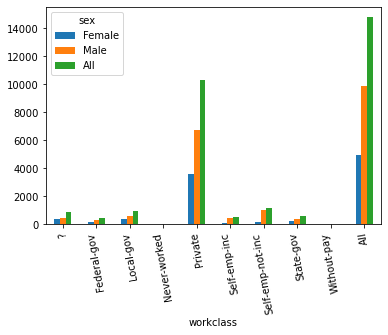

In [28]:
# Creates a barplot

# x means the label rotation
barplot = crossTable.plot.bar(rot=100)

In [29]:
#create another contengency table for sex and marital status
crossTable2 = pd.crosstab(DF1.sex, DF1.maritalStatus,margins = True )
print(crossTable2)

maritalStatus  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                              
Female             1219                  7                 761   
Male                795                  4                6010   
All                2014                 11                6771   

maritalStatus  Married-spouse-absent  Never-married  Separated  Widowed    All  
sex                                                                             
Female                            95           2160        290      380   4912  
Male                             104           2717        182       73   9885  
All                              199           4877        472      453  14797  


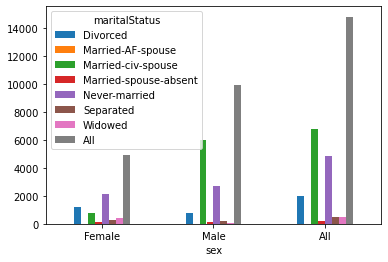

In [30]:
# Creates a barplot

# x means the label rotation
barplot = crossTable2.plot.bar(rot=0)

In [31]:
# create a new frame for age above 40

DF2 = DF1[(DF1.age > 40)]

DF2

,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


In [32]:
#Recreate a new contengency table for sex and marital

crossTable3 = pd.crosstab(DF2.sex, DF2.maritalStatus, margins = True)
print(crossTable3)

maritalStatus  Divorced  Married-civ-spouse  Married-spouse-absent  \
sex                                                                  
Female              720                 305                     38   
Male                448                3383                     47   
All                1168                3688                     85   

maritalStatus  Never-married  Separated  Widowed   All  
sex                                                     
Female                   256        133      354  1806  
Male                     315         74       71  4338  
All                      571        207      425  6144  


In [33]:
# z-score the education
from scipy import stats
import matplotlib.pyplot as plt


DF1['education'] = stats.zscore(DF1.education, nan_policy='omit')

DF1.outliers = DF1.query('(education > 3 | education < -3)')['education']

DF1.outliers



/var/folders/lt/4n5gxc6n2779nhw2njh60c280000gn/T/ipykernel_82036/3239446525.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  DF1.outliers = DF1.query('(education > 3 | education < -3)')['education']


72      -3.105523
101     -3.490403
199     -3.105523
243     -3.105523
437     -3.105523
           ...   
14254   -3.105523
14318   -3.105523
14475   -3.105523
14551   -3.490403
14724   -3.105523
Name: education, Length: 113, dtype: float64

In [15]:
# standardize the age , and use the three sigma rule
DF1['age'] = stats.zscore(DF1.age, nan_policy='omit')
DF1.outliers = DF1.query('(age > 3 | age < -3)')['age']
DF1.outliers


99       3.751354
204      3.020275
492      3.751354
552      3.605138
885      3.751354
1066     3.751354
1485     3.166491
2420     3.751354
2430     3.020275
2467     3.751354
2877     3.751354
3453     3.239598
3868     3.385814
3891     3.166491
4008     3.020275
4114     3.751354
4643     3.020275
4680     3.751354
5154     3.312706
5481     3.751354
5936     3.751354
5961     3.312706
6450     3.020275
6476     3.751354
7147     3.312706
7254     3.751354
7651     3.093383
7724     3.020275
8346     3.020275
8405     3.751354
8477     3.020275
8608     3.751354
8768     3.239598
8773     3.166491
8785     3.751354
8921     3.751354
9369     3.166491
9397     3.385814
9561     3.093383
9857     3.093383
10158    3.751354
10282    3.166491
10468    3.605138
10470    3.312706
10991    3.458922
11091    3.751354
11108    3.166491
11234    3.093383
11562    3.751354
11604    3.020275
12656    3.312706
12948    3.751354
13455    3.093383
14091    3.751354
14281    3.532030
14455    3

In [34]:
# create a new frame for age above 80

NewAge = DF1[(DF1.age > 80)]

NewAge



,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income
99,90,Private,-0.411359,Never-married,Other-service,Male,0,2206,<=50K
492,90,Private,-0.411359,Never-married,Other-service,Female,0,0,<=50K
552,88,Self-emp-not-inc,1.897924,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K
885,90,Private,1.128163,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1066,90,Private,-0.026479,Never-married,Other-service,Male,0,0,<=50K
1485,82,?,-2.335762,Widowed,?,Male,0,0,<=50K
2420,90,Private,-1.950881,Never-married,Adm-clerical,Female,0,0,<=50K
2467,90,Local-gov,1.513043,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K
2877,90,Self-emp-not-inc,1.128163,Married-civ-spouse,Prof-specialty,Male,10566,0,<=50K
3453,83,Private,-0.411359,Widowed,Protective-serv,Male,0,0,<=50K


<AxesSubplot:>

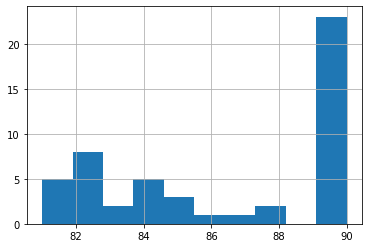

In [35]:
NewAge.age.hist()